In [1]:
import numpy as np
import pylab as mplot
%pylab inline
import astropy.io.fits as pf
import healpy as hp

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls /project2/chihway/dhayaa/DECADE/rowe_stats/Maps/

psf_e1_map_V1.fits	psf_err_e2_map_V1.fits	 star_number_counts_map_V1.fits
psf_e2_map_V1.fits	psf_Terr_e1_map_V1.fits
psf_err_e1_map_V1.fits	psf_Terr_e2_map_V1.fits


In [3]:
PSF_E1_Err = hp.read_map('/project2/chihway/dhayaa/DECADE/rowe_stats/Maps/psf_err_e1_map_V1.fits')
PSF_E2_Err = hp.read_map('/project2/chihway/dhayaa/DECADE/rowe_stats/Maps/psf_err_e2_map_V1.fits')
PSF_TE1_Err = hp.read_map('/project2/chihway/dhayaa/DECADE/rowe_stats/Maps/psf_Terr_e1_map_V1.fits')
PSF_TE2_Err = hp.read_map('/project2/chihway/dhayaa/DECADE/rowe_stats/Maps/psf_Terr_e2_map_V1.fits')
PSF_E1 = hp.read_map('/project2/chihway/dhayaa/DECADE/rowe_stats/Maps/psf_e1_map_V1.fits')
PSF_E2 = hp.read_map('/project2/chihway/dhayaa/DECADE/rowe_stats/Maps/psf_e2_map_V1.fits')




In [4]:
nside = hp.npix2nside(len(PSF_E1_Err))

In [5]:
pix = np.arange(len(PSF_E1_Err))
theta, phi = hp.pix2ang(1024, pix)

In [6]:
ra = phi/np.pi*180
dec = 90 - theta/np.pi*180

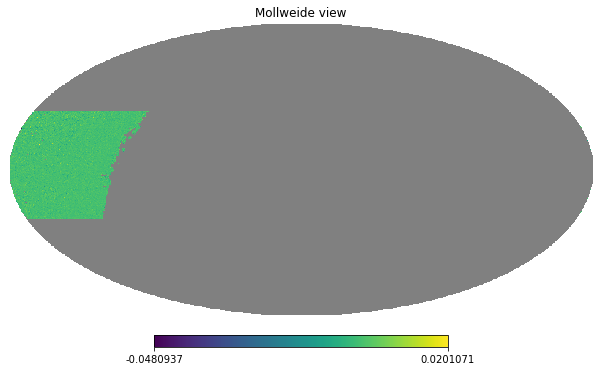

In [7]:
hp.mollview(PSF_E1_Err)

In [8]:
mask = (PSF_E1_Err!=hp.UNSEEN)

(array([ 79720.,  88937.,  96954., 101903., 104378., 108335., 110420.,
        111577., 115699., 112169.]),
 array([-24.78856071, -19.32691876, -13.86527682,  -8.40363487,
         -2.94199292,   2.51964903,   7.98129097,  13.44293292,
         18.90457487,  24.36621681,  29.82785876]),
 <BarContainer object of 10 artists>)

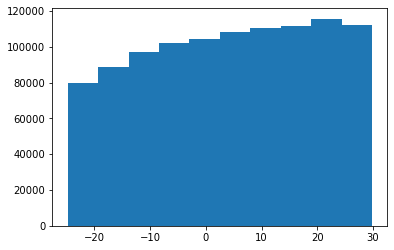

In [9]:
mplot.hist(dec[mask])

In [10]:
E1 = []
E2 = []
E1_std = []
E2_std = []

E1_err = []
E2_err = []
E1_err_std = []
E2_err_std = []

TE1_err = []
TE2_err = []
TE1_err_std = []
TE2_err_std = []

Dec_bin = []
for i in range(20):
    dec_min= -25 + (30+25)/20*i
    dec_max = -25 + (30+25)/20*(i+1)
    Dec_bin.append((dec_min+dec_max)/2)
    mask_dec = (dec[mask]>dec_min)*(dec[mask]<dec_max)

    E1.append(np.mean(PSF_E1[mask][mask_dec]))
    E2.append(np.mean(PSF_E2[mask][mask_dec]))
    E1_std.append(np.std(PSF_E1[mask][mask_dec])/np.sqrt(len(PSF_E1[mask][mask_dec])))
    E2_std.append(np.std(PSF_E2[mask][mask_dec])/np.sqrt(len(PSF_E1[mask][mask_dec])))   

    E1_err.append(np.mean(PSF_E1_Err[mask][mask_dec]))
    E2_err.append(np.mean(PSF_E2_Err[mask][mask_dec]))
    E1_err_std.append(np.std(PSF_E1_Err[mask][mask_dec])/np.sqrt(len(PSF_E1_Err[mask][mask_dec])))
    E2_err_std.append(np.std(PSF_E2_Err[mask][mask_dec])/np.sqrt(len(PSF_E1_Err[mask][mask_dec])))   

    TE1_err.append(np.mean(PSF_TE1_Err[mask][mask_dec]))
    TE2_err.append(np.mean(PSF_TE2_Err[mask][mask_dec]))
    TE1_err_std.append(np.std(PSF_TE1_Err[mask][mask_dec])/np.sqrt(len(PSF_TE1_Err[mask][mask_dec])))
    TE2_err_std.append(np.std(PSF_TE2_Err[mask][mask_dec])/np.sqrt(len(PSF_TE1_Err[mask][mask_dec])))   


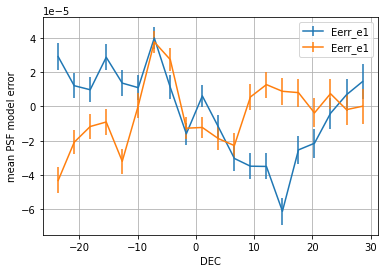

In [11]:
mplot.errorbar(Dec_bin, E1_err, E1_err_std, label='Eerr_e1')
mplot.errorbar(Dec_bin, E2_err, E2_err_std, label='Eerr_e1')
mplot.grid()
mplot.xlabel('DEC')
mplot.ylabel('mean PSF model error')
mplot.legend()

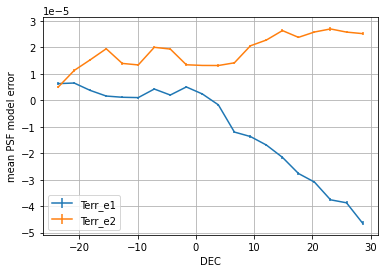

In [12]:
mplot.errorbar(Dec_bin, TE1_err, TE1_err_std, label='Terr_e1')
mplot.errorbar(Dec_bin, TE2_err, TE2_err_std, label='Terr_e2')
mplot.grid()
mplot.xlabel('DEC')
mplot.ylabel('mean PSF model error')
mplot.legend()

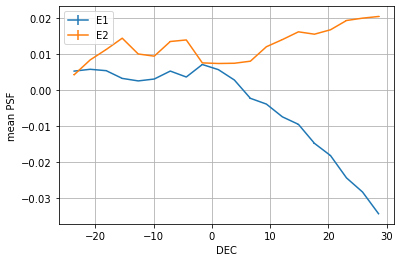

In [15]:
mplot.errorbar(Dec_bin, -np.array(E1), E1_std, label='E1')
mplot.errorbar(Dec_bin, -np.array(E2), E2_std, label='E2')
mplot.grid()
mplot.xlabel('DEC')
mplot.ylabel('mean PSF')
mplot.legend()